In [1]:
import pandas as pd

In [2]:
#checking the gpu on google colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Nov 13 16:00:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#checking the RAM on google colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
!ls

df10.pkl  df14.pkl  df4.pkl  df8.pkl	   df.pkl	   Untitled0.ipynb
df11.pkl  df1.pkl   df5.pkl  df9.pkl	   df_vectors.pkl  Untitled1.ipynb
df12.pkl  df2.pkl   df6.pkl  df_core.csv   emails.csv	   Untitled2.ipynb
df13.pkl  df3.pkl   df7.pkl  df_extra.csv  Enron_df.ipynb  Untitled3.ipynb


In [10]:
df = pd.read_csv('emails.csv')

In [11]:
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [12]:
df.message[4]

"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45.  "

In [14]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ' '
    keys_to_extract = ['message-id', 'date', 'from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email


In [13]:
def map_to_list(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append(' ')
        else:
            results.append(email[key])
    return results

In [15]:
def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'message-id': map_to_list(emails, 'message-id'), 
        'date': map_to_list(emails, 'date'),
        'to_': map_to_list(emails, 'to'), 
        'from_': map_to_list(emails, 'from'),
        'body': map_to_list(emails, 'body')
        }

In [16]:
email_df = pd.DataFrame(parse_into_emails(df.message))

In [17]:
from pandas import option_context

with option_context('display.max_colwidth', 700):
    display(email_df.loc[220050:220080])

,message-id,date,to_,from_,body
220050,<14359593.1075856608853.JavaMail.evans@thyme>,"Tue, 13 Mar 2001 08","vince.kaminski@enron.com, vasant.shanbhogue@enron.com",bryan.seyfried@enron.com,"when we laast spoke, we agreed that you would look to support some of ourdevelopment efforts from Houston. if possible, i would like to have a quickconference call this week to figure out where we are and move forward.thanks"
220051,<15212839.1075857051239.JavaMail.evans@thyme>,"Fri, 7 Jan 2000 01",Vasant Shanbhogue/HOU/ECT@ECT,katja.schilling@enron.com,"Dear VinceThank you very much for the information.I will get in touch with them today and will keep you informed as to theoutcome.Regards,KatjaVince J KaminskiKatja,RISK magazine has the copyright. You have to contact them to get thepermission to use thisfor external users.Sh?n MillieRisk Books28-29 HaymarketLondon SW1Y 4RXwww.riskpublications.comand discuss the legal aspects with her.VinceVasant ShanbhogueI do not think minor changes would allow you to just use the same file. Youwill have to check with Risk. This is Risk Books, a specialist division ofLondon SW1Y 4RX.Risk Management, Investment and Portfolio Optimisation,"" publishd in 1998. Iam not sure if a lawyer was involved, may..."
220052,<30973036.1075857051261.JavaMail.evans@thyme>,"Mon, 3 Jan 2000 23",Vince J Kaminski/HOU/ECT@ECT,vince.kaminski@enron.com,"Ben,Let me review it one more time from this angle. If you don't hear from me byWednesday,it's OK to post it.VinceBenjamin ParsonsVince,Bijoya is currently working on the development of the website for the newcredit trading initiative, and we thought it would be a good idea to put myrecent technical article ""Measuring Credit Risk"" on it. Are you okay withthis release, or does it contain any proprietary information we should editout?Ben"
220053,<362185.1075857051284.JavaMail.evans@thyme>,"Wed, 22 Dec 1999 09","james.new@enron.com, richard.lewis@enron.com, barry.pearce@enron.com,",anjam.ahmad@enron.com,"amir.ghodsian@enron.com, simon.hastings@enron.com,ali.lloyd@enron.comWe have established a set of power volatility curves down to the EFA/monthlylevel of detail that can be marked to market up to 6 years out. Beyond this,the volatility decays to what we understand to be the long-term level forpower volatility, given our understanding of the behaviour of forward pricesover large time-scales.The swaption traders can now fit the first 5-6 years of the volatility curveto the market-observed baseload swaption implied volatilities (typically 3 to12 months duration for the underlying swap) and then be in a good position toprice other swaptions (including swaptions on individual EFA slots)cons..."
220054,<13900297.1075857051307.JavaMail.evans@thyme>,"Mon, 20 Dec 1999 09",Benjamin Parsons/LON/ECT@ECT,benjamin.parsons@enron.com,"Vince,I've been invited to speak at the conference below in Amsterdam in April.This is along with the Monte Carlo conference a week later which Stinson hasforwarded my name for. Both are by EPRM, and shouldn't take too much time toprepare as will be on similar topics to the previous conference at which Ispoke. Should I go to both, or start prioritising these events?Ben---------------------- Forwarded by Benjamin Parsons/LON/ECT on 20/12/99Enron Capital & Trade Resources Corp.Please respond to ""Angela Adedeji"" <aadedeji@risk.co.uk>Dear BenIt is with great pleasure that I enclose details of EPRM's 3rd annualcongress. I would like to invite you to become involved as a speaker on theprogram..."
220055,<12259853.1075840784817.JavaMail.evans@thyme>,"Wed, 25 Apr 2001 15",Vince J Kaminski/HOU/ECT@ECT,vince.kaminski@enron.com,"vince.kaminski@enron.comvince.kaminski@enron.comAnita,Two weeks I mentioned was just to indicate an approximate duration of the stay.I would leave the final decision to Iris, in coordination with Vasant and Amitava, basedon the business need.One week, with the possibility of extension if necessary is fine.VinceAnita DuPont@ENRONI am making reservation

In [18]:
email_df.drop(email_df.query("body == '' | to_ == '' | from_ == ''").index, inplace=True)

In [19]:
from_at_enron_dot_com_df = email_df[email_df['from_'].str.contains('@enron.com')]
from_at_enron_dot_com_df

,message-id,date,to_,from_,body
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,Here is our forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,Traveling to have a business meeting takes th...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,"Randy,Can you send me a schedule of the salar..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05",greg.piper@enron.com,phillip.allen@enron.com,
...,...,...,...,...,...
517378,<28740402.1075842029506.JavaMail.evans@thyme>,"Thu, 20 Dec 2001 09",stephanie.sever@enron.com,john.zufferli@enron.com,Here is the update list that you requested. M...
517384,<30449512.1075842029649.JavaMail.evans@thyme>,"Wed, 12 Dec 2001 09",astrid.montes@powerpool.ab.ca,john.zufferli@enron.com,Please set up access for the digital certific...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 13",kori.loibl@enron.com,john.zufferli@enron.com,This is a trade with OIL-SPEC-HEDGE-NG (John ...
517397,<25835861.1075842029959.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 12",john.lavorato@enron.com,john.zufferli@enron.com,Some of my position is with the Alberta Term ...


In [5]:
# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller chunks
def split_dataframe(df, chunk_size = 25000): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return list(chunks)

In [21]:
list_of_dfs = split_dataframe(from_at_enron_dot_com_df, chunk_size=25000)

In [23]:
#using regex to remove e-mail addresses
df1 = list_of_dfs[0]
df1['body'] = df1['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#using regex to remove e-mail addresses
df2 = list_of_dfs[1]
df2['body'] = df2['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#using regex to remove e-mail addresses
df3 = list_of_dfs[2]
df3['body'] = df3['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#using regex to remove e-mail addresses.  
#However, the below has corrupted data, so I had to split furhter.
# df4 = list_of_dfs[3]
# df4['body'] = df4['body'].str.replace(r'\S*@\S*', '')

In [ ]:
#using regex to remove e-mail addresses.  
#However, the below has corrupted data, so I had to split furhter.
# df5 = list_of_dfs[4]
# df5['body'] = df5['body'].str.replace(r'\S*@\S*', '')

In [25]:
#using regex to remove e-mail addresses.
df6 = list_of_dfs[5]
df6['body'] = df6['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#using regex to remove e-mail addresses.
df7 = list_of_dfs[6]
df7['body'] = df7['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#using regex to remove e-mail addresses.
df8 = list_of_dfs[7]
df8['body'] = df8['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#using regex to remove e-mail addresses.
df9 = list_of_dfs[8]
df9['body'] = df9['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#using regex to remove e-mail addresses.
df10 = list_of_dfs[9]
df10['body'] = df10['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#using regex to remove e-mail addresses.
df11 = list_of_dfs[10]
df11['body'] = df11['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#using regex to remove e-mail addresses.
df12 = list_of_dfs[11]
df12['body'] = df12['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#using regex to remove e-mail addresses.
df13 = list_of_dfs[12]
df13['body'] = df13['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#using regex to remove e-mail addresses.
df14 = list_of_dfs[13]
df14['body'] = df14['body'].str.replace(r'\S*@\S*', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
#after regex code removed e-mail addresses, the below concats back into a larger df
df = pd.concat([df1, df2, df3, df6, df7, df8, df9, df10, df11, df12, df13, df14])

In [36]:
df.to_csv('df_core.csv')

In [3]:
df_core = pd.read_csv('df_core.csv')

In [38]:
#spliting df4 further (it had corrupted data)
df4_list = split_dataframe(list_of_dfs[3], chunk_size = 6250)

In [39]:
df40 = df4_list[0]
df41 = df4_list[1]
df42 = df4_list[2]
df43 = df4_list[3]

In [40]:
#spliting df5 further (it had corrupted data)
df5_list = split_dataframe(list_of_dfs[4], chunk_size = 6250)

In [41]:
df50 = df5_list[0]
df51 = df5_list[1]
df52 = df5_list[2]
df53 = df5_list[3]

In [9]:
#df43 and df50 had corrupted data, so, I discarded them.
df_extra = pd.concat([df40, df41, df42, df51, df52, df53])

In [6]:
df_extra_list = split_dataframe(df_extra, chunk_size = 6250)

In [8]:
df40 = df_extra_list[0]
df41 = df_extra_list[1]
df42 = df_extra_list[2]
#df43
#df50
df51 = df_extra_list[5]
df52 = df_extra_list[6]
df53 = df_extra_list[7]

In [14]:
df40['body'] = df40['body'].str.replace(r'\S*@\S*', '')

In [15]:
df41['body'] = df41['body'].str.replace(r'\S*@\S*', '')

In [16]:
df42['body'] = df42['body'].str.replace(r'\S*@\S*', '')

In [ ]:
#df43['body'] = df43['body'].str.replace(r'\S*@\S*', '')

In [ ]:
#df50['body'] = df50['body'].str.replace(r'\S*@\S*', '')

In [11]:
df51['body'] = df51['body'].str.replace(r'\S*@\S*', '')

In [12]:
df52['body'] = df52['body'].str.replace(r'\S*@\S*', '')

In [13]:
df53['body'] = df53['body'].str.replace(r'\S*@\S*', '')

In [ ]:
#df43 and df50 had corrupted data, so, I discarded them.
df_extra = pd.concat([df40, df41, df42, df51, df52, df53])

In [18]:
df_extra.to_csv('df_extra.csv')

In [14]:
df_core = df_core.drop('Unnamed: 0', axis=1)
df_core.columns

Index(['message-id', 'date', 'to_', 'from_', 'body'], dtype='object')

In [15]:
df_extra = df_extra.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df_extra.columns

Index(['message-id', 'date', 'to_', 'from_', 'body'], dtype='object')

In [16]:
df = pd.concat([df_core, df_extra])
df

,message-id,date,to_,from_,body
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,Here is our forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,Traveling to have a business meeting takes th...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,"Randy,Can you send me a schedule of the salar..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05",greg.piper@enron.com,phillip.allen@enron.com,
...,...,...,...,...,...
31245,<19486407.1075846933094.JavaMail.evans@thyme>,"Thu, 9 Mar 2000 00","Frank L Davis/HOU/ECT@ECT, Karen Lambert/HOU/E...",tana.jones@enron.com,Samuel Tom Brant DebbieR Brian Bhau...
31246,<8903316.1075847311372.JavaMail.evans@thyme>,"Wed, 28 Feb 2001 03",tana.jones@enron.com,marianne.wilkins@enron.com,"Hello, Tana,I have been asked if we could ple..."
31247,<18819793.1075847311398.JavaMail.evans@thyme>,"Wed, 28 Feb 2001 03",pyoung@cliverunnells.com,Tana.Jones@enron.com [mailto,"I have a tire pump, but I could take it to Bi..."
31248,<20196358.1075847311423.JavaMail.evans@thyme>,"Wed, 28 Feb 2001 03",justin.boyd@enron.com,tana.jones@enron.com,I left you a voicemail yesterday about gettin...


In [17]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['body'] = df.body.map(alphanumeric).map(punc_lower)
df.head()

,message-id,date,to_,from_,body
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,here is our forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05",greg.piper@enron.com,phillip.allen@enron.com,


In [18]:
df.to_csv('df.csv')

In [31]:
df = pd.read_csv('df.csv')

In [32]:
# new data frame with split value columns 
new = df["date"].str.split(" ", n = 4, expand = True) 

df["day_of_week"]= new[0] 
df["day"]= new[1]
df["month"]= new[2] 
df["year"]= new[3] 
  
# Dropping old date column
df.drop(columns =["date"], inplace = True) 

# df display 
df

,Unnamed: 0,message-id,to_,from_,body,day_of_week,day,month,year
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,"Mon,",14,May,2001
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...,"Fri,",4,May,2001
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,"Wed,",18,Oct,2000
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...,"Mon,",23,Oct,2000
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,greg.piper@enron.com,phillip.allen@enron.com,,"Thu,",31,Aug,2000
...,...,...,...,...,...,...,...,...,...
330852,31245,<19486407.1075846933094.JavaMail.evans@thyme>,"Frank L Davis/HOU/ECT@ECT, Karen Lambert/HOU/E...",tana.jones@enron.com,samuel tom brant debbier brian bhau...,"Thu,",9,Mar,2000
330853,31246,<8903316.1075847311372.JavaMail.evans@thyme>,tana.jones@enron.com,marianne.wilkins@enron.com,hello tana i have been asked if we could ple...,"Wed,",28,Feb,2001
330854,31247,<18819793.1075847311398.JavaMail.evans@thyme>,pyoung@cliverunnells.com,Tana.Jones@enron.com [mailto,i have a tire pump but i could take it to bi...,"Wed,",28,Feb,2001
330855,31248,<20196358.1075847311423.JavaMail.evans@thyme>,justin.boyd@enron.com,tana.jones@enron.com,i left you a voicemail yesterday about gettin...,"Wed,",28,Feb,2001


In [28]:
df['year'] = df['year'].str.replace(r'[^\w\s]+', '')
df['month'] = df['month'].str.replace(r'[^\w\s]+', '')
df['day'] = df['day'].str.replace(r'[^\w\s]+', '')

In [53]:
years_list= ['1996','1997','1998','1999','2000','2001','2002','2003',1996,1997,1998,1999,2000,2001,2002,2003]
df_clean_years = df[df['year'].isin(years_list)]


In [54]:
day_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
            '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
df_clean_days = df_clean_years[df_clean_years['day'].isin(day_list)]

In [58]:
month_list = ['May', 'Oct', 'Aug', 'Jul', 'Sep', 'Apr', 'Jun', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov']

df_clean_months = df_clean_days[df_clean_days['month'].isin(month_list)]

In [69]:
df.year.unique()

array(['2001', '2000', '1999', '2002', '1998', '1997'], dtype=object)

In [70]:
df.month = df.month.replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11,'Dec':12})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
df[["day", "year"]] = df[["day", "year"]].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [77]:
df.year.unique()

array([2001, 2000, 1999, 2002, 1998, 1997])

In [78]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
df

,Unnamed: 0,message-id,to_,from_,body,day_of_week,day,month,year,date
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,"Mon,",14,5,2001,2001-05-14
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...,"Fri,",4,5,2001,2001-05-04
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,"Wed,",18,10,2000,2000-10-18
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...,"Mon,",23,10,2000,2000-10-23
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,greg.piper@enron.com,phillip.allen@enron.com,,"Thu,",31,8,2000,2000-08-31
...,...,...,...,...,...,...,...,...,...,...
330852,31245,<19486407.1075846933094.JavaMail.evans@thyme>,"Frank L Davis/HOU/ECT@ECT, Karen Lambert/HOU/E...",tana.jones@enron.com,samuel tom brant debbier brian bhau...,"Thu,",9,3,2000,2000-03-09
330853,31246,<8903316.1075847311372.JavaMail.evans@thyme>,tana.jones@enron.com,marianne.wilkins@enron.com,hello tana i have been asked if we could ple...,"Wed,",28,2,2001,2001-02-28
330854,31247,<18819793.1075847311398.JavaMail.evans@thyme>,pyoung@cliverunnells.com,Tana.Jones@enron.com [mailto,i have a tire pump but i could take it to bi...,"Wed,",28,2,2001,2001-02-28
330855,31248,<20196358.1075847311423.JavaMail.evans@thyme>,justin.boyd@enron.com,tana.jones@enron.com,i left you a voicemail yesterday about gettin...,"Wed,",28,2,2001,2001-02-28


In [80]:
df.to_csv('df.csv')

In [82]:
df = pd.read_csv('df.csv')

In [87]:
df_skilling = df[df['from_'].str.contains("jeff.skilling@enron.com")]
df_skilling

,Unnamed: 0,Unnamed: 0.1,message-id,to_,from_,body,day_of_week,day,month,year,date
124175,126625,126625,<32403336.1075840874043.JavaMail.evans@thyme>,"k..allen@enron.com, frank.bay@enron.com, sally...",jeff.skilling@enron.com,plan t...,"Wed,",1,8,2001,2001-08-01
124532,126985,126985,<27340032.1075852999006.JavaMail.evans@thyme>,"k..allen@enron.com, frank.bay@enron.com, sally...",jeff.skilling@enron.com,plan t...,"Wed,",1,8,2001,2001-08-01
168972,171747,171747,<17965192.1075843904443.JavaMail.evans@thyme>,"joao.carlos.albuquerque@enron.com, ray.alvarez...",jeff.skilling@enron.com,...,"Thu,",3,5,2001,2001-05-03
170251,173028,173028,<24661138.1075843944165.JavaMail.evans@thyme>,"joao.carlos.albuquerque@enron.com, ray.alvarez...",jeff.skilling@enron.com,...,"Thu,",3,5,2001,2001-05-03
170652,173429,173429,<3019755.1075843954264.JavaMail.evans@thyme>,"joao.carlos.albuquerque@enron.com, ray.alvarez...",jeff.skilling@enron.com,...,"Thu,",3,5,2001,2001-05-03
...,...,...,...,...,...,...,...,...,...,...,...
248545,251801,251801,<19875121.1075845518791.JavaMail.evans@thyme>,ISC Hotline/Corp/Enron@Enron,jeff.skilling@enron.com,thank you for your help isc hotlineyour p num...,"Thu,",15,3,2001,2001-03-15
248573,251829,251829,<5150670.1075845519502.JavaMail.evans@thyme>,david.oxley@enron.com,jeff.skilling@enron.com,david just heard that you joined the enron...,"Wed,",4,4,2001,2001-04-04
248604,251862,251862,<4689511.1075845520310.JavaMail.evans@thyme>,"joao.carlos.albuquerque@enron.com, ray.alvarez...",jeff.skilling@enron.com,...,"Thu,",3,5,2001,2001-05-03
271272,274645,274645,<27602352.1075860207269.JavaMail.evans@thyme>,"joao.carlos.albuquerque@enron.com, ray.alvarez...",jeff.skilling@enron.com,...,"Thu,",3,5,2001,2001-05-03


In [99]:
df_lay = df[df['from_'].str.contains("kenneth.lay@enron.com")]

from pandas import option_context

with option_context('display.max_colwidth', 700):
    display(df_lay)



,Unnamed: 0,Unnamed: 0.1,message-id,to_,from_,body,day_of_week,day,month,year,date
26437,27823,27823,<15972620.1075863369115.JavaMail.evans@thyme>,"k..allen@enron.com, sally.beck@enron.com, tim.belden@enron.com,",kenneth.lay@enron.com,you have any questions please call joannie williamson at,"Sat,",25,8,2001,2001-08-25
130397,132900,132900,<28082704.1075840285171.JavaMail.evans@thyme>,Jeff Skilling/Corp/Enron@ENRON,kenneth.lay@enron.com,sarah cindy olson requested that i forward this to you for further handling rosalee forwarded by kenneth lay corp enron on does things right leadership does the right things peterdrucker today i began to wonder if i ve been a fool in staunchly defending enron svisions values an esteemed colleague of very strong professional reputation at enron wasrecently approached by a hiring supervisor totally unexpected unsolicited an offer was accepted all seemed well as this recruit got goodfeedback directly from clients enron upper mgmt but after a short time suddenly recruit was told that performance was unsatisfactory no specificbehaviors or proble...,"Mon,",10,7,2000,2000-07-10
130544,133056,133056,<12160993.1075840204228.JavaMail.evans@thyme>,Jeff Skilling/Corp/Enron@ENRON,kenneth.lay@enron.com,sarah cindy olson requested that i forward this to you for further handling rosalee forwarded by kenneth lay corp enron on does things right leadership does the right things peterdrucker today i began to wonder if i ve been a fool in staunchly defending enron svisions values an esteemed colleague of very strong professional reputation at enron wasrecently approached by a hiring supervisor totally unexpected unsolicited an offer was accepted all seemed well as this recruit got goodfeedback directly from clients enron upper mgmt but after a short time suddenly recruit was told that performance was unsatisfactory no specificbehaviors or proble...,"Mon,",10,7,2000,2000-07-10
131266,133819,133819,<20155709.1075840232296.JavaMail.evans@thyme>,Jeff Skilling/Corp/Enron@ENRON,kenneth.lay@enron.com,sarah cindy olson requested that i forward this to you for further handling rosalee forwarded by kenneth lay corp enron on does things right leadership does the right things peterdrucker today i began to wonder if i ve been a fool in staunchly defending enron svisions values an esteemed colleague of very strong professional reputation at enron wasrecently approached by a hiring supervisor totally unexpected unsolicited an offer was accepted all seemed well as this recruit got goodfeedback directly from clients enron upper mgmt but after a short time suddenly recruit was told that performance was unsatisfactory no specificbehaviors or proble...,"Mon,",10,7,2000,2000-07-10
132108,134682,134682,<30661811.1075845189364.JavaMail.evans@thyme>,"tom.acton@enron.com, janie.aguayo@enron.com, amelia.alland@enron.com,",kenneth.lay@enron.com,want to take this opportunity before the transfer of houston pipeline company assets and employees to american electric power to thank each of you for your teamwork and success in our years together some of you were here when i joined your company in but many of you arrived during the enron era and might not know the full story of my arrival i was president of transco energy at the time and was probably in line to be the chairman i did not expect to ever join another energy company yet the directors of houston natural gas felt like a new management team was needed for their company to prosper in a rapidly chang...,"Wed,",30,5,2001,2001-05-30
132109,134683,134683,<367217.1075852816474.JavaMail.evans@thyme>,rickbe@microsoft.com,kenneth.lay@enron.com,as i am sure you have read by now jeff skilling has chosen to leave enron jeff is resigning for personal reasons and his decision is voluntary i regret his decision but i accept and understand it i have worked closely with jeff for more than years including here at enron and have had few if any professional relationships that i value more i am pleased to say 

In [104]:
with option_context('display.max_colwidth', 700):
    display(df_skilling.tail(50))

,Unnamed: 0,Unnamed: 0.1,message-id,to_,from_,body,day_of_week,day,month,year,date
248393,251645,251645,<14175030.1075852686946.JavaMail.evans@thyme>,fernando.fernandez@enron.com,jeff.skilling@enron.com,fernando i did receive your e mails and wanted to assure you that your concerns are being dealt with thank you jeff,"Wed,",1,8,2001,2001-08-01
248395,251647,251647,<30628850.1075840163265.JavaMail.evans@thyme>,"=09Elena Chilkina/Enron@EnronXGate, Jose Marquez/Enron@EnronXGate, Kevin=",jeff.skilling@enron.com,outlook migration teamg mike a tony william alan dorothy james ma ritta michael brian alan bob charles harvey henry james ken n randy rusty stan tara adrian brian carol denise denka eduardo elio felicia felipe frances jana l joy kari keith lisa b maria alejandra mariella rudolf sean steve steve timothy b veronica veronica wendi yen alvin cynthia jesse joann joe a lia meredith robert scott s teve tamara tracy nikita amy debra jeff john josh larry mark mary ann mary lynne mike morris rinetia robert tyrone billy ear l jeff joannie kenneth lena office of the rosalee sally sherri suzanne tori l bridget m...,"Mon,",14,5,2001,2001-05-14
248398,251650,251650,<8541273.1075840163402.JavaMail.evans@thyme>,"""'jeff.skilling@enron.com'"" <jeff.skilling@enron.com>",jeff.skilling@enron.com,erica due to the fact that jeff is unable to attend on july i believe it would be better to reschedule the call for sometime next quarter thanks write on behalf of jerry murdock who is currently in europe mr murdockasked me to pass on the following information regarding your telephone callinsight capital hosts a quarterly dinner with robert rubin and stevefriedman and other selected guests our next dinner is scheduled for and will be held in aspen colorado the current state of the globalmarket will be one of the topics under discussion and jack welch of ge isone of your fellow invitees the purpose of your conversation with mr murdock is to discuss the above inmore d...,"Mon,",14,5,2001,2001-05-14
248399,251651,251651,<7320534.1075840163425.JavaMail.evans@thyme>,"""'jeff.skilling@enron.com'"" <jeff.skilling@enron.com>",jeff.skilling@enron.com,erica jeff is currently scheduled to be on vacation july would it be possible to schedule during the next quarter thanks joanniei write on behalf of jerry murdock who is currently in europe mr murdockasked me to pass on the following information regarding your telephone callinsight capital hosts a quarterly dinner with robert rubin and stevefriedman and other selected guests our next dinner is scheduled for and will be held in aspen colorado the current state of the globalmarket will be one of the topics under discussion and jack welch of ge isone of your fellow invitees the purpose of your conversation with mr murdock is to discuss the above inmore detail and to more f...,"Mon,",14,5,2001,2001-05-14
248400,251652,251652,<14520710.1075861550051.JavaMail.evans@thyme>,jskilli@enron.com,jeff.skilling@enron.com,north briarwood courthouston texas you joannie williamsonhi jeff the pictures of the skilling boys arrived and are wonderful thankyou i need your new home address and telephone number please send atyour convince love dad,"Tue,",24,4,2001,2001-04-24
248401,251653,251653,<25667808.1075840163448.JavaMail.evans@thyme>,(Recipient list suppressed),jeff.skilling@enron.com,jeff skilling is unable to attend thank you joannie williamsonthere are only a few available spaces at the upcoming harvard forum don tmiss this new and exciting event make your reservations today seemeeting details below harvard university club of houston harvard forum raising children of character in a world of affluence dinner and discussion clubjoin us for a new type of harvard club experience ever wanted to talksubstantively about a topic while having a great dinner but were afraidthat your dinner guests would not be able to go the distance with you inthe conversation we have the solution modeled after a format that member...,"Mon,",14,5,2001,2001

In [105]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english', min_df=15, max_df=100000)

body_cv1  = cv1.fit_transform(df.body)

In [106]:
body_cv1

<326486x64925 sparse matrix of type '<class 'numpy.int64'>'
	with 17869263 stored elements in Compressed Sparse Row format>

In [107]:
df_vectors = pd.DataFrame.sparse.from_spmatrix(body_cv1)
df_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64885,64886,64887,64888,64889,64890,64891,64892,64893,64894,64895,64896,64897,64898,64899,64900,64901,64902,64903,64904,64905,64906,64907,64908,64909,64910,64911,64912,64913,64914,64915,64916,64917,64918,64919,64920,64921,64922,64923,64924
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
df_vectors.to_pickle('df_vectors.pkl')

In [109]:
dtm = pd.read_pickle("./df_vectors.pkl")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda_df_vectors = LatentDirichletAllocation(n_components=20, random_state=0)
lda_df_vectors.fit(dtm)

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.025     , 0.025     , 0.025     , ..., 0.025     , 0.025     ,
        0.025     ],
       [0.00081967, 0.15468564, 0.69053752, ..., 0.14084242, 0.00081967,
        0.00081967],
       [0.7625    , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ],
       ...,
       [0.10572556, 0.00147059, 0.00147059, ..., 0.00147059, 0.00147059,
        0.00147059],
       [0.00555556, 0.00555556, 0.00555556, ..., 0.00555556, 0.00555556,
        0.00555556],
       [0.09700964, 0.005     , 0.005     , ..., 0.005     , 0.005     ,
        0.005     ]])

In [ ]:
filename = 'lda_df_vectors.sav'

In [ ]:
pkl.dump(lda_df_vectors, open(filename, 'wb'))

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_df_vectors = pkl.load(open(filename, 'rb'))

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
#below isn't working
#pyLDAvis.sklearn.prepare(lda_df_vectors, dtm, cv1)

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
!pip install corextopic
!pip install networkx

In [111]:
import numpy as np
words = list(np.asarray(cv1.get_feature_names()))

In [112]:
pip install corextopic

In [113]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(body_cv1, words=words, docs=df.body)

In [114]:
#topics according to CorEx
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: said,plants,percent,news,officials,copyright,according,largest,jones,lower
1: market,power,state,energy,electricity,california,customers,utilities,commission,prices
2: enron,business,new,management,year,company,support,provide,including,continue
3: information,agreement,use,intended,mail,need,review,confidential,financial,issues
4: time,like,think,just,make,work,good,know,going,way
5: gas,price,based,term,cost,long,capacity,rate,day,month


In [115]:
#top documents that explain the above topics
topic_model.get_top_docs(topic=4, n_docs=2)

[(' am                            thanks carlos talked to me yesterday and is excited at the prospect of themexican work rose hasn t called me yet thanks for the intro more tickets are available as many as you want  i think you re the only realfan in the group    hadn t heard the biggio story i ll check into it andpass any gossip   i think asmus will be a good addition  but we still need agood starter      original message     we are getting the enron treatment from coral   i hope carolyn told you icalled yesterday   coral was looking for shell approval   i m guessing itis in a coma   i usually have   voice mails  and i have had   today  whichtells you something   good  time for michael to be sick carlos has interviews today and tomorrow with ena   i think he is lookinggood for mexico   you guys are the absolutely best qualified for thatbusiness  and i ll start planting that seed when i can by the way  thanks for the great job on coral   did you hear from rose onthe hsr on turbopark we

In [143]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(body_cv1), columns=['topic'+str(i) for i in range(5)])
predictions.head(10)

,topic0,topic1,topic2,topic3,topic4
0,False,False,False,False,False
1,False,False,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,True,False,False,False


In [146]:
predictions.shape

(326486, 5)

In [147]:
df.shape

(326486, 11)

In [148]:
df_final = pd.concat([df,predictions], axis=1)
df_final.shape

(326486, 16)

In [ ]:
#topics
#0 = Confidential Information
#1 = Trading and the Market
#2 = Meetings and Projects
#3 = News
#4 = Human Resources

In [153]:
df_final = df_final.rename(columns={'topic0': "Confidential_Information", 'topic1': "Trading_and_the_Market",
                         'topic2': "Meetings_and_Projects", 'topic3': "News", 'topic4':"Human_Resources"})

In [152]:
df_final = df_final.drop(['day_of_week', 'day', 'month', 'year','Unnamed: 0','Unnamed: 0.1'], axis=1)

,message-id,to_,from_,body,date,topic0,topic1,topic2,topic3,topic4
0,<18782981.1075855378110.JavaMail.evans@thyme>,tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,2001-05-14,False,False,False,False,False
1,<15464986.1075855378456.JavaMail.evans@thyme>,john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...,2001-05-04,False,False,True,False,False
2,<24216240.1075855687451.JavaMail.evans@thyme>,leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,2000-10-18,False,False,False,False,False
3,<13505866.1075863688222.JavaMail.evans@thyme>,randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...,2000-10-23,False,False,False,False,False
4,<30922949.1075863688243.JavaMail.evans@thyme>,greg.piper@enron.com,phillip.allen@enron.com,,2000-08-31,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
326481,<19486407.1075846933094.JavaMail.evans@thyme>,"Frank L Davis/HOU/ECT@ECT, Karen Lambert/HOU/E...",tana.jones@enron.com,samuel tom brant debbier brian bhau...,2000-03-09,False,False,False,False,False
326482,<8903316.1075847311372.JavaMail.evans@thyme>,tana.jones@enron.com,marianne.wilkins@enron.com,hello tana i have been asked if we could ple...,2001-02-28,True,False,False,False,False
326483,<18819793.1075847311398.JavaMail.evans@thyme>,pyoung@cliverunnells.com,Tana.Jones@enron.com [mailto,i have a tire pump but i could take it to bi...,2001-02-28,False,False,True,False,False
326484,<20196358.1075847311423.JavaMail.evans@thyme>,justin.boyd@enron.com,tana.jones@enron.com,i left you a voicemail yesterday about gettin...,2001-02-28,False,False,False,False,False


In [154]:
df_final

,message-id,to_,from_,body,date,Confidential_Information,Trading_and_the_Market,Meetings_and_Projects,News,Human_Resources
0,<18782981.1075855378110.JavaMail.evans@thyme>,tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,2001-05-14,False,False,False,False,False
1,<15464986.1075855378456.JavaMail.evans@thyme>,john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...,2001-05-04,False,False,True,False,False
2,<24216240.1075855687451.JavaMail.evans@thyme>,leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,2000-10-18,False,False,False,False,False
3,<13505866.1075863688222.JavaMail.evans@thyme>,randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...,2000-10-23,False,False,False,False,False
4,<30922949.1075863688243.JavaMail.evans@thyme>,greg.piper@enron.com,phillip.allen@enron.com,,2000-08-31,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
326481,<19486407.1075846933094.JavaMail.evans@thyme>,"Frank L Davis/HOU/ECT@ECT, Karen Lambert/HOU/E...",tana.jones@enron.com,samuel tom brant debbier brian bhau...,2000-03-09,False,False,False,False,False
326482,<8903316.1075847311372.JavaMail.evans@thyme>,tana.jones@enron.com,marianne.wilkins@enron.com,hello tana i have been asked if we could ple...,2001-02-28,True,False,False,False,False
326483,<18819793.1075847311398.JavaMail.evans@thyme>,pyoung@cliverunnells.com,Tana.Jones@enron.com [mailto,i have a tire pump but i could take it to bi...,2001-02-28,False,False,True,False,False
326484,<20196358.1075847311423.JavaMail.evans@thyme>,justin.boyd@enron.com,tana.jones@enron.com,i left you a voicemail yesterday about gettin...,2001-02-28,False,False,False,False,False


In [155]:
import matplotlib.pyplot as plt

In [179]:
df_news = df_final[df_final.Human_Resources == True]
df_news
#ci = 47,340
#tm = 33,602
#mp = 63,241
#news = 16,811
#HR = 44,353


,message-id,to_,from_,body,date,Confidential_Information,Trading_and_the_Market,Meetings_and_Projects,News,Human_Resources
12,<13116875.1075855687561.JavaMail.evans@thyme>,Richard Burchfield/HOU/ECT@ECT,phillip.allen@enron.com,forwarded by phillip k...,2000-10-09,True,True,True,False,True
13,<2707340.1075855687584.JavaMail.evans@thyme>,Richard Burchfield/HOU/ECT@ECT,phillip.allen@enron.com,forwarded by phillip k...,2000-10-09,True,True,True,False,True
25,<19034252.1075855687825.JavaMail.evans@thyme>,"""Phillip Allen"" <pallen@enron.com>",phillip.allen@enron.com,forwarded by phillip k...,2000-09-26,True,True,True,True,True
26,<719350.1075855687850.JavaMail.evans@thyme>,"""Phillip Allen"" <pallen@enron.com>",phillip.allen@enron.com,forwarded by phillip k...,2000-09-26,True,True,True,True,True
40,<31434120.1075855688116.JavaMail.evans@thyme>,cbpres@austin.rr.com,phillip.allen@enron.com,george below is a list of questions that keit...,2000-09-20,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
326335,<31234745.1075847305734.JavaMail.evans@thyme>,all.downtown@enron.com,enron.announcements@enron.com,trizechahn office properties has notified enr...,2001-02-21,False,False,False,False,True
326367,<2603847.1075847306869.JavaMail.evans@thyme>,all_ena_egm_eim@enron.com,enron.announcements@enron.com,business highlightsegm fundamentalslowell bez...,2001-02-22,True,True,True,True,True
326391,<25734004.1075847307508.JavaMail.evans@thyme>,"""Antuna, Luis (L)"" <LAntuna@dow.com>, ""'agross...",mark.taylor@enron.com,mark worked for the first half of to try a...,2001-02-23,True,True,True,False,True
326432,<19967083.1075847309154.JavaMail.evans@thyme>,"Mark Taylor/HOU/ECT@ECT, Jeff Blumenthal/HOU/E...",savita.puthigai@enron.com,kevin we have one last change...,2001-02-27,True,True,False,False,True


In [ ]:
#ci = 47,340
#tm = 33,602
#mp = 63,241
#news = 16,811
#HR = 44,353

In [195]:
df_topics = pd.read_csv("count_topics_enron.csv")

In [196]:
df_topics = df_topics.fillna(0)
df_topics.loc[0]

Confidential Information    47340
Trading and Markets         33602
Meetings and Projects       63241
News                        16811
Human Resources             44353
Name: 0, dtype: int64

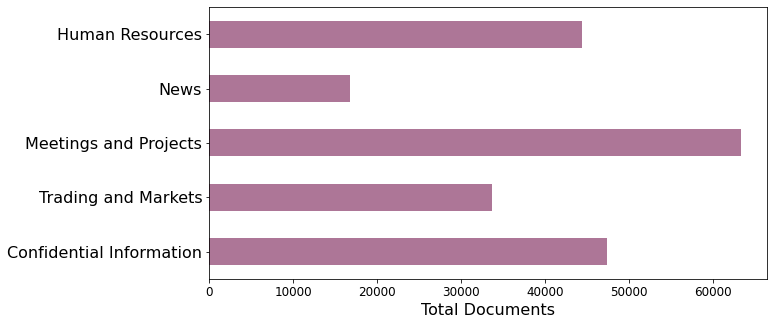

In [218]:
plt.figure(figsize=(10,5))
# plt.barh(df_topics, sum(df_topics), color="#ad7697")
plt.xlabel('Total Documents', fontsize=16,)
plt.yticks(fontsize=16);
plt.xticks(fontsize=12);

df_topics.loc[0].plot(kind='barh', color="#ad7697");
plt.savefig('topics.png', transparent=True, bbox_inches='tight')

In [222]:
df_final["Confidential_Information"] = df_final["Confidential_Information"].astype(int)
df_final["Trading_and_the_Market"] = df_final["Trading_and_the_Market"].astype(int)
df_final["Meetings_and_Projects"] = df_final["Meetings_and_Projects"].astype(int)
df_final["News"] = df_final["News"].astype(int)
df_final["Human_Resources"] = df_final["Human_Resources"].astype(int)

In [223]:
df_final

,message-id,to_,from_,body,date,Confidential_Information,Trading_and_the_Market,Meetings_and_Projects,News,Human_Resources
0,<18782981.1075855378110.JavaMail.evans@thyme>,tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,2001-05-14,0,0,0,0,0
1,<15464986.1075855378456.JavaMail.evans@thyme>,john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...,2001-05-04,0,0,1,0,0
2,<24216240.1075855687451.JavaMail.evans@thyme>,leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,2000-10-18,0,0,0,0,0
3,<13505866.1075863688222.JavaMail.evans@thyme>,randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...,2000-10-23,0,0,0,0,0
4,<30922949.1075863688243.JavaMail.evans@thyme>,greg.piper@enron.com,phillip.allen@enron.com,,2000-08-31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
326481,<19486407.1075846933094.JavaMail.evans@thyme>,"Frank L Davis/HOU/ECT@ECT, Karen Lambert/HOU/E...",tana.jones@enron.com,samuel tom brant debbier brian bhau...,2000-03-09,0,0,0,0,0
326482,<8903316.1075847311372.JavaMail.evans@thyme>,tana.jones@enron.com,marianne.wilkins@enron.com,hello tana i have been asked if we could ple...,2001-02-28,1,0,0,0,0
326483,<18819793.1075847311398.JavaMail.evans@thyme>,pyoung@cliverunnells.com,Tana.Jones@enron.com [mailto,i have a tire pump but i could take it to bi...,2001-02-28,0,0,1,0,0
326484,<20196358.1075847311423.JavaMail.evans@thyme>,justin.boyd@enron.com,tana.jones@enron.com,i left you a voicemail yesterday about gettin...,2001-02-28,0,0,0,0,0


In [238]:
df_count = df_final.set_index('date')
df_count = df_count.drop(['message-id', 'to_', 'from_', 'body'], axis=1)
df_count

,Confidential_Information,Trading_and_the_Market,Meetings_and_Projects,News,Human_Resources
date,,,,,
2001-05-14,0,0,0,0,0
2001-05-04,0,0,1,0,0
2000-10-18,0,0,0,0,0
2000-10-23,0,0,0,0,0
2000-08-31,0,0,0,0,0
...,...,...,...,...,...
2000-03-09,0,0,0,0,0
2001-02-28,1,0,0,0,0
2001-02-28,0,0,1,0,0


Confidential_Information                      ... News          
                                   count      mean       std  ...  50%  75%  max
Human_Resources                                               ...               
0                               282133.0  0.096121  0.294758  ...  0.0  0.0  1.0
1                                44353.0  0.455911  0.498058  ...  0.0  1.0  1.0

[2 rows x 32 columns]

In [118]:
topic_model = ct.Corex(n_hidden=5, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(body_cv1, words=words, docs=df.body, 
                anchors=[['fraud', 'scared', 'nervous', 'confidential', 'high', 'priority',
                          'issue', 'privileged', 'use', 'officials', 'authorities'],
                         ['price', 'trade', 'delivery', 'billion', 'million', 'energy', 'oil',
                          'gas', 'power', 'trading', 'prices', 'deliveries', 'millions', 'billions'],
                         ['meeting', 'time', 'deck', 'work', 'think'], 
                         ['flight','airport', 'hotel', 'travel', 'world', 'international'],
                         ['support', 'promotion', 'career']], anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: use,confidential,privileged,issue,agreement,high,information,intended,mail,recipient
1: power,energy,gas,price,prices,market,million,billion,state,based
2: time,work,think,like,meeting,make,just,know,want,week
3: world,said,companies,international,years,public,plants,federal,percent,news
4: support,enron,business,new,management,year,company,provide,team,continue


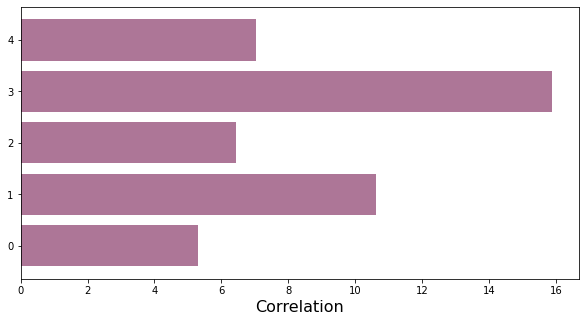

In [136]:
plt.figure(figsize=(10,5))
plt.barh(range(topic_model.tcs.shape[0]), topic_model.tcs, color="#ad7697")
plt.xlabel('Correlation', fontsize=16)
plt.ylabel('', fontsize=16);

In [ ]:
contain_values = df[df['body'].str.contains('creative accounting')]
contain_values

,message-id,date,to_,from_,body
260208,<27340325.1075840928330.JavaMail.evans@thyme>,"Mon, 12 Nov 2001 07",,courtney.votaw@enron.com,dynegy s enron deal faces major uncertainties...
260213,<430201.1075840931879.JavaMail.evans@thyme>,"Fri, 9 Nov 2001 05",,m..schmidt@enron.com,enron slashes profits since by partn...
260215,<5428447.1075840932062.JavaMail.evans@thyme>,"Thu, 8 Nov 2001 05",,m..schmidt@enron.com,dynegy is in talks on purchasing enron de...
323184,<28337255.1075841146630.JavaMail.evans@thyme>,"Wed, 6 Feb 2002 08",sarah.palmer@enron.com,sarah.palmer@enron.com,skilling to testify thursdaydow jones news se...
323536,<23889631.1075841156703.JavaMail.evans@thyme>,"Thu, 31 Jan 2002 13",sarah.palmer@enron.com,sarah.palmer@enron.com,special edition with businessweek and timethe...
323597,<16250680.1075841160177.JavaMail.evans@thyme>,"Tue, 29 Jan 2002 06",sarah.palmer@enron.com,sarah.palmer@enron.com,enron names stephen f cooper interim ceo and...


In [ ]:
from pandas import option_context

with option_context('display.max_colwidth', 700):
    display(contain_values)

,message-id,date,to_,from_,body
260208,<27340325.1075840928330.JavaMail.evans@thyme>,"Mon, 12 Nov 2001 07",,courtney.votaw@enron.com,dynegy s enron deal faces major uncertainties huge new liabilities possible regulatory opposition may complicate takeoverwall street journal finance the dynegy enron deal utilities in bid for project stake financial times puts trust in the quiet approach financial times prove crucial at enron financial times placedynegy s rushed gamble on enron carries some big risksthe new york times on the streetbasic principle of accounting tripped enronthe wall street journal s enron deal faces uncertainties potential antitrust worries or new enron liabilities could upset agreementthe wall street journal competitors give dynegy enron merger ...
260213,<430201.1075840931879.JavaMail.evans@thyme>,"Fri, 9 Nov 2001 05",,m..schmidt@enron.com,enron slashes profits since by partnership dealings cited as dynegy talks go on debt ratings an issuethe wall street journal enron trust its new numbers it doesn t act like itthe new york times steps not the swiftest are propelling dynegy past enronthe new york times admits to overstating profits by about millionthe new york times halts talks with enron awaits credit rating bloomberg adds up years of errorshouston chronicle dynegy still talking mergerhouston chronicle s in crisis restated figures show how earnings were cut financial times five dumbest things on wall street this weekthestreet com ...
260215,<5428447.1075840932062.JavaMail.evans@thyme>,"Thu, 8 Nov 2001 05",,m..schmidt@enron.com,dynegy is in talks on purchasing enron deal would include infusion of c ash to assist firm in shoring up financesthe wall street journal is said to be near to acquiring enron for billionthe new york times impenetrable deals have put firm in position where it may lose independence talks with rival dynegythe wall street journal of enron is challengedthe new york times in takeover talks with dynegylos angeles times times nov times nov times nov may acquire enronhouston chronicle deals downshifted at breakneck speedhouston chronicle completes sales of two unitshouston chronicle enron negotiates sale...
323184,<28337255.1075841146630.JavaMail.evans@thyme>,"Wed, 6 Feb 2002 08",sarah.palmer@enron.com,sarah.palmer@enron.com,skilling to testify thursdaydow jones news service exec skilling won t take fifthdow jones international news secy to address enron hearingsassociated press knew in march that partnerships caused lossesbloomberg panel hears enron s powers before exec testimoniesdow jones energy service post dip financing continues sliding downhilldow jones news service s broadband unit owes back taxesassociated press newswires to fight astros attempt to get ballpark name backdow jones news service of schemes newsday s labour secretary to testify as hearings continue in enron collapsethe canadian press knew there was trouble ...
323536,<23889631.1075841156703.JavaMail.evans@thyme>,"Thu, 31 Jan 2002 13",sarah.palmer@enron.com,sarah.palmer@enron.com,special edition with businessweek and timethe man behind the deal machineas creator of iffy enron partnerships ousted cfo andrew fastow is a prime target for investigatorsthe swamp fox on enron s tailis billy tauzin a longtime accounting industry pal the right man to lead the hill s charge bracing for a backlashafter enron business may be subjected to a new wave of regulationrunning for coveragesuddenly policies to cover execs are growing scarcea new periodic series will guide you through accounting issuesa regulator with his own conflicts of interestshould you follow the insiders mimicking their trades in company stock is no sure road to richesthe post enron world ...
323597,<16250680.1075841160177.JavaMail.evans@thyme>,"Tue, 29 Jan 2002 06",sarah.palmer@enron.com,sarah.palmer@enron.com,enron names stephen f cooper interim ceo and chiefprnewswire names stephen cooper interim ceo chief restructuring officerafx news did he know wife says enron ceo was 

In [135]:
import spacy
from spacy import displacy

In [133]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Ask why, Asshole.")
displacy.serve(doc, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

doc = []
counter = 0
for i in df.body[0:10]:
    doc.append(nlp(i))
    displacy.render(doc[counter], style='dep', options={'distance': 80})
    counter+=1

In [ ]:
df_small = df[0:50]
df_small['spacy_doc'] = list(nlp.pipe(df_small.body))
df_small

<ipython-input-18-54fd40ab5dd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['spacy_doc'] = list(nlp.pipe(df_small.body))


,message-id,date,to_,from_,body,spacy_doc
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,"(here, is, our, forecast)"
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes the...,"(traveling, to, have, a, business, meeting, ta..."
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,"(test, successful, , way, to, go, )"
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salary...,"(randy, can, you, send, me, a, schedule, of, t..."
5,<30965995.1075863688265.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 04",greg.piper@enron.com,phillip.allen@enron.com,greg how about either next tuesday or thursday...,"(greg, how, about, either, next, tuesday, or, ..."
6,<16254169.1075863688286.JavaMail.evans@thyme>,"Tue, 22 Aug 2000 07","david.l.johnson@enron.com, john.shafer@enron.com",phillip.allen@enron.com,phillip allen pallen enron com mike grigsby ...,"(phillip, allen, , pallen, enron, com, mike, ..."
8,<20641191.1075855687472.JavaMail.evans@thyme>,"Tue, 17 Oct 2000 02",mark.scott@enron.com,phillip.allen@enron.com,i don t think these are required by the st...,"(i, don, t, think, these, are, required, by, t..."
9,<30795301.1075855687494.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06","""'Pallen@Enron.com'"" <Pallen@Enron.com>",phillip.allen@enron.com,forwarded by phillip k ...,"( , forwarded, by, phill..."
10,<33076797.1075855687515.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06",buck.buckner@honeywell.com,phillip.allen@enron.com,mr buckner for delivered gas behind san diego...,"(mr, , buckner, for, delivered, gas, behind, ..."
11,<25459584.1075855687536.JavaMail.evans@thyme>,"Fri, 13 Oct 2000 06",stagecoachmama@hotmail.com,phillip.allen@enron.com,lucy open them and save in the rentroll folder...,"(lucy, open, them, and, save, in, the, rentrol..."


In [ ]:
df_small2 = df[51:100]
df_small2

,message-id,date,to_,from_,body
54,<31071154.1075855688399.JavaMail.evans@thyme>,"Mon, 11 Sep 2000 07",frank.hayden@enron.com,phillip.allen@enron.com,why is aeco basis so low on the list is nwpl...
55,<5273698.1075855688420.JavaMail.evans@thyme>,"Mon, 11 Sep 2000 02",jsmith@austintx.com,phillip.allen@enron.com,jeff you would clearly receive a commission on...
56,<17791617.1075855688442.JavaMail.evans@thyme>,"Fri, 8 Sep 2000 05","""Phillip Allen"" <pallen@enron.com>",phillip.allen@enron.com,forwarded by phillip k ...
57,<20163768.1075855688465.JavaMail.evans@thyme>,"Fri, 8 Sep 2000 05","""Phillip Allen"" <pallen@enron.com>",phillip.allen@enron.com,forwarded by phillip k ...
58,<26254346.1075855688486.JavaMail.evans@thyme>,"Wed, 6 Sep 2000 08",pallen@enron.com,phillip.allen@enron.com,forwarded by phillip k ...
59,<16024444.1075855688508.JavaMail.evans@thyme>,"Wed, 6 Sep 2000 07",pallen@enron.com,phillip.allen@enron.com,forwarded by phillip k ...
60,<14974170.1075855688529.JavaMail.evans@thyme>,"Wed, 6 Sep 2000 07",retwell@sanmarcos.net,phillip.allen@enron.com,larry just a note to touch base on the sagewoo...
61,<9093068.1075855378565.JavaMail.evans@thyme>,"Tue, 1 May 2001 17","=09Allison Horton/NA/Enron@ENRON, Amir Baig/NA...",phillip.allen@enron.com,forwarded by phillip k ...
62,<12637670.1075855688550.JavaMail.evans@thyme>,"Wed, 6 Sep 2000 06",ina.rangel@enron.com,phillip.allen@enron.com,ina
63,<1776521.1075855688576.JavaMail.evans@thyme>,"Wed, 6 Sep 2000 04","John D Suarez/HOU/ECT@ECT, Suresh Vasan/Enron ...",phillip.allen@enron.com,jay reitmeyer enron com frank ermis enron com...
